# Natural Language Processing and Sentiment Analysis

## Natural Language Processing

First, think about C3PO, Luke Skywalker's robot sidekick in Star Wars. C3P0 is a fantasized version of human-computer interaction in the distant future. However, humans interacting with machines is an every day reality for us. Your home or car smart assistant (Alexa), customer service on websites or phone lines, autocorrect features, etc. are all examples of Natural Language Processing.

Natural Language Processing (NLP) is the field of deriving meaningful information from human speech. NLP is a branch of computer science, or more specifically a branch of artificial intelligence, concerned with allowing computers the ability to understand human speech either in a written or spoken format. 






## NLP can be used for many purposes
There are many different varieties of natural language processing. These are just a few real world examples of these techniques to give an idea of how this is used today.

#### Sentiment Analysis
This is most of what we will be doing today. Sentiment analysis examines text in order to identify the general "feeling" of the text. Take this example...
Businesses are using sentiment analysis today to monitor and evaluate customer service. Does this customer seem satisfied?

![airbnb tweet](./images/airbnb.png)

This person is not happy. By analyzing sentiment analysis on customer support chats, tweets, etc. a company can get insights on where their service model is not working. 
    
#### Topic Modeling
Topic modeling is an unsupervised machine learning technique that is capable of scanning a set of documents, detecting patterns within them, and automatically clustering word groups or similar expressions that characterize the documents.  An example...
Imagine that you work at a legal firm and someone at a company has embezzled money. You need to figure out who that person is and you are monitoring company emails from the last six months. There are probably thousands of emails and you don't want to waste time reading all of them. In this case, you can have a computer read the text of the emails and identify the ones that are relevant to the topic of money, narrowing down the amount of emails needed to read
    
![email examples](./images/topicmodeling.png)
    
#### Text Generation
Text generation is simply the task of producing new text. A very common example of this is autocomplete or autofill features, such as when texting or in a search engine. Take the following example, we all use this every day right?

![google autofill](./images/google.png)

The code simple predicts what you might type next...

## Data Gathering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk     #natural language toolkit

### Import Sample Data from NLTK

For starters, we will use some sample data that I am providing to you. This is data from Amazon.com for product reviews.

In [15]:
data = pd.read_csv('/Users/ep9k/Desktop/sentiment_analysis/Reviews.csv')

In [16]:
print(data)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

Let's see the text of just the first row of the dataset

In [17]:
# show the text of just the first review
print(test_corpus['Text'][0])


I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


Here you can see the size and shape of the test data. There are over 500,000 reviews in this dataset so let's make it smaller, just for our the purposes of our workshop today.

In [18]:
data.shape

(568454, 10)

In [20]:
# I am simplifying the dataset to just the first 500 reviews
data = data.head(500)

# Exploratory Data Analysis (EDA)
Let's play with the data to see what is in it. There are a lot of reasons for doing this.

Products have a score of 1-5. Let's see how many times each score occurs

In [21]:
data['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

Let's use Matplotlib to visualize the data in a plot

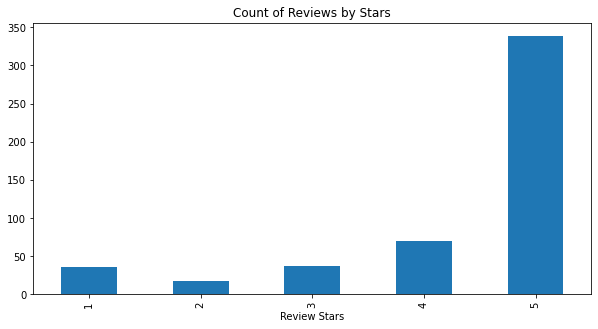

In [27]:
ax = data['Score'].value_counts().sort_index().plot(kind='bar',
                                title='Count of Reviews by Stars',
                                figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# NLTK Basics

In [30]:
example_text = data['Text'][50]
print(example_text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


## Tokenization

NLTK allows tokenization out of the box with word_tokenize(). However, it is a little bit messy

In [34]:
tokens = nltk.word_tokenize(example_text)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


## Part of Speech
We can find the part of speech for each token. [Here](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/) is a (complete?) list of NLTK's parts of speech. 

In [36]:
tagged = nltk.pos_tag(tokens)

## VADER Sentiment Scoring
VADER - Valence Aware Dictionary for sEntiment Reasoning. VADER is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity of emotion. This model does not account for relationships between words. This is the "bag of word" approach. All words in the text are thrown into a bag and scored. The cumulative score determines the final rating.

In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [43]:
sia = SentimentIntensityAnalyzer()

A few quick examples of the Sentiment Intensity Analyzer in action.

In [44]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

The compound score has a range of values from -1 to +1 to rate how positive (+1) or negative (-1) a statement is. 

In [45]:
sia.polarity_scores('This is the worst!')

{'neg': 0.594, 'neu': 0.406, 'pos': 0.0, 'compound': -0.6588}

Now let's run this on our example text from earlier

In [49]:
print(example_text)
sia.polarity_scores(example_text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Now let's run it on our entire dataset

In [90]:
results = {}

for i, row in data.iterrows():
    text = row['Text']
    myId = row['Id']
    results[myId] = sia.polarity_scores(text)
    


In [76]:
vaders = pd.DataFrame(results).T

Now let's merge our vaders sentiment scores with our original dataframe

In [93]:
#it is actually very easy to do
data = data.merge(vaders)

In [94]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
